<a href="https://colab.research.google.com/github/venkatavellanki/venkatavellanki/blob/main/Academic_Performance_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    'Rno': list(range(1, 46)) + [1, 2, 3, 4, 5],  # 5 duplicate roll numbers
    'Name': ['Student' + str(i) for i in range(1, 46)] + ['Student' + str(i) for i in range(1, 6)],
    'Gender': np.random.choice(['Male', 'Female'], size=50),
    'S1': np.random.randint(30, 100, size=50),
    'S2': np.random.randint(30, 100, size=50),
    'S3': np.random.randint(30, 100, size=50)
}

df = pd.DataFrame(data)

df.loc[0, 'S1'] = np.nan
df.loc[10, 'S2'] = np.nan
df.loc[20, 'S3'] = np.nan

df.to_csv("academic_data.csv", index=False)

print("Dataset created successfully!")

Dataset created successfully!


In [3]:
df = pd.read_csv("academic_data.csv")

In [4]:
print("First 10 Students:\n", df.head(10))

female_students = df[df['Gender'] == 'Female']
print("\nFemale Students:\n", female_students)

print("\nRno and S1 (Duplicates Removed):\n", df[['Rno', 'S1']].drop_duplicates(subset='Rno'))

print("\nFemale Students and S2:\n", female_students[['Name', 'S2']])

male_s1_sorted = df[df['Gender'] == 'Male'][['Name', 'S1']].sort_values(by='S1')
print("\nMale Students' S1 Marks (Ascending):\n", male_s1_sorted)

print("\nNames Starting with 'S':\n", df[df['Name'].str.lower().str.startswith('s')])

print("\nNames Ending with 'n':\n", df[df['Name'].str.lower().str.endswith('n')])

df['Total Marks'] = df[['S1', 'S2', 'S3']].sum(axis=1)
print("\nTotal Marks:\n", df[['Name', 'Total Marks']])

print("\nFemale Students Total Marks:\n", df[df['Gender'] == 'Female'][['Name', 'Total Marks']])

df['Percentage'] = (df['Total Marks'] / 300) * 100

def grade(p):
    if p >= 80:
        return 'A'
    elif p >= 60:
        return 'B'
    elif p >= 40:
        return 'C'
    else:
        return 'FAIL'

df['Grade'] = df['Percentage'].apply(grade)

print("\nPercentage & Grades:\n", df[['Name', 'Percentage', 'Grade']])

First 10 Students:
    Rno       Name  Gender    S1    S2    S3
0    1   Student1    Male   NaN  34.0  82.0
1    2   Student2    Male  82.0  38.0  77.0
2    3   Student3  Female  34.0  38.0  58.0
3    4   Student4    Male  80.0  52.0  67.0
4    5   Student5    Male  87.0  83.0  73.0
5    6   Student6    Male  77.0  34.0  60.0
6    7   Student7    Male  81.0  43.0  67.0
7    8   Student8  Female  80.0  36.0  62.0
8    9   Student9    Male  59.0  45.0  60.0
9   10  Student10  Female  63.0  61.0  54.0

Female Students:
     Rno       Name  Gender    S1    S2    S3
2     3   Student3  Female  34.0  38.0  58.0
7     8   Student8  Female  80.0  36.0  62.0
9    10  Student10  Female  63.0  61.0  54.0
10   11  Student11  Female  85.0   NaN  32.0
11   12  Student12  Female  56.0  44.0  86.0
17   18  Student18  Female  38.0  78.0  83.0
23   24  Student24  Female  94.0  65.0  62.0
24   25  Student25  Female  38.0  35.0  64.0
26   27  Student27  Female  56.0  73.0  36.0
27   28  Student28  Female 

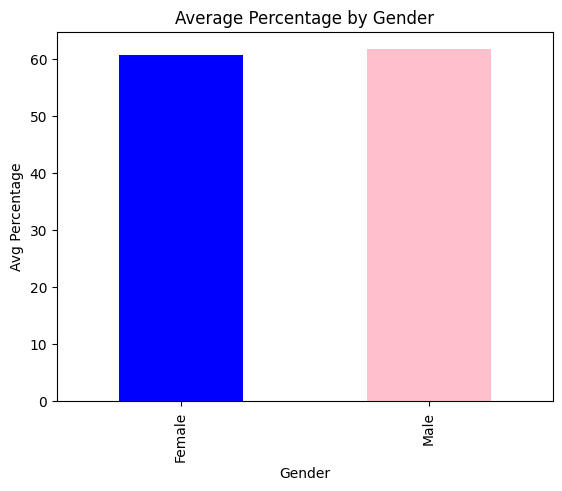

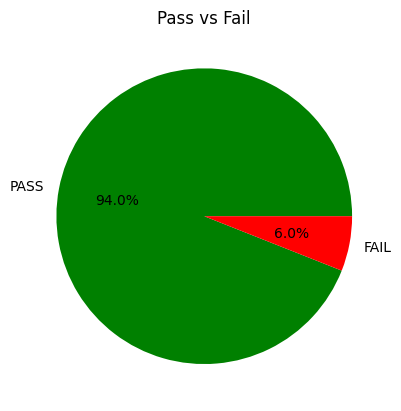

In [5]:
gender_avg = df.groupby('Gender')['Percentage'].mean()
gender_avg.plot(kind='bar', color=['blue', 'pink'], title='Average Percentage by Gender')
plt.ylabel("Avg Percentage")
plt.show()

df['Result'] = df['Grade'].apply(lambda x: 'PASS' if x in ['A', 'B', 'C'] else 'FAIL')
result_counts = df['Result'].value_counts()
result_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], title='Pass vs Fail')
plt.ylabel("")
plt.show()

In [6]:
from google.colab import files
files.download('academic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>